# Feature Tracker

In this notebook you'll determine _good_ image features to track using [OpenCV](https://opencv.org/). There are many suitable algorithms, among them the *Shi-Tomasi* feature detector. While ths amounts to adding a couple of lines of code, there are several paramters to set which greatly imapact the result.

In [3]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import imageio
from moviepy.editor import ImageSequenceClip

In [4]:
plt.rcParams['figure.figsize'] = 12, 12

Load the video clip. The video from the downward facing camera of the drone San Francisco simulator environment.

In [5]:
reader = imageio.get_reader('vid.mp4')

Get the first frame of the clip, you can use this to quickly iterate on your solution.

In [6]:
img0 = reader.get_data(0)

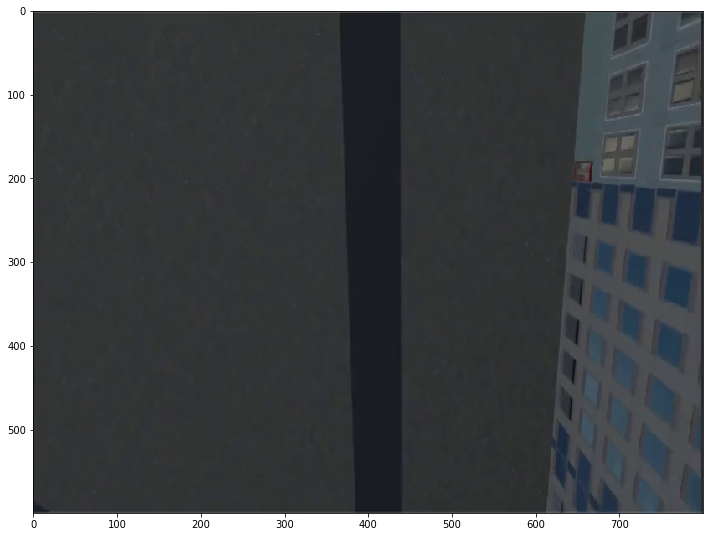

In [7]:
plt.imshow(img0)

Use [`cv.goodFeaturesToTrack`](https://docs.opencv.org/3.4.1/dd/d1a/group__imgproc__feature.html#ga1d6bb77486c8f92d79c8793ad995d541) to retrieve features using *Shi-Tomasi*. You'll notice `feature_params` below, feel free to change the values. If you're not sure what role a value plays read the docs.

In [8]:
# TODO: Set the feature params
feature_params = dict(maxCorners=0,  # no limit on number of corners
                      qualityLevel=0.05,
                      minDistance=50,
                      blockSize=7)

In [9]:
def transform(reader):
    frames = []

    # NOTE: You may want to limit this for loop
    # to a shorter range at first.
    # for i in range(reader.get_length()):
    # frame = reader.get_data(i)
    for frame in reader:
        corners = shi_tomasi(frame)
        
        if corners is None or len(corners) == 0:
            continue
            
        corners = np.reshape(corners, (-1, 2)).astype(int)
                
        for ind in corners:
            # draws a white circle at a feature location
            frame = cv.circle(frame, (ind[0], ind[1]), 5, [255, 255, 255], -1)
        
        frames.append(frame)
        
    return frames

def shi_tomasi(img):
    # TODO: complete the implementation
    # return best pixels to track according to Shi-Tomasi
    
    # image must converted to grayscale prior to detecting features
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    corners = cv.goodFeaturesToTrack(gray, **feature_params)
    return corners

This may take a few seconds.

In [10]:
%time frames = transform(reader)
print(len(frames), frames[0].shape)

Wall time: 5.14 s
360 (600, 800, 3)


Turn the frames into a movie, just like in Hollywood :)

In [11]:
clip = ImageSequenceClip(frames, fps=30)
clip.ipython_display()

t:   5%|███▏                                                               | 17/360 [00:00<00:02, 166.67it/s, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4
